## Базовые функции для работы в openCV

Данная библиотека предназанчена для работы с визуальным контентом и последующей обработкой методами машинного зрения.

В этом ноутбуке будут рассмотрены базовые функции данной библиотеки

Ставится простой командой `pip install opencv-python`

In [1]:
import cv2 #Уверен, что всем очевидно, что это OpenCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Для демонстрации базовых функций возьмем случайное фото из сети интернет и на его примере рассмотрим такие вещи как:
1. Загрузка изображения
2. Показ изображения средствами OpenCV
3. Смена цветового пространства
4. Масштабирование изображения
4. Бинаризация изображений
5. Выделение контуров объектов

## Загрузка изображения 

Вообще, OpenCV умеен почти в любой формат изображения(если нажать `Shift + Tab` в функции `cv2.imread()` или перейти на страницу документации, то можно озгнакмиться с полным списком)

`cv2.imread()` - позволяет прочитать изображение, зная его расположение. 

Однако, данная функция имеет обманку, на которую может попасться новичек. В большинстве случаев цветные изображения имеют цветовую схему RGB, однако `cv2.imread()`  возвращает изображение в схеме BGR(при параметрах по умолчанию). При обработке стоит об этом помнить

In [55]:
picture = cv2.imread('yabloko.jpg')

## Отображение изображения

`cv2.imshow()` - функция имеет 2 обязательных аргумента: название окошка, в октором будет отображаться картиночка и саму картиночку 

`cv2.waitKey()` - параметром функции является время на которое появится изображение. При равенстве 0 или -1 изображение будет отображаться до тех пор, пока пользователь на нажмет любую клавишу на клавиатуре

`cv2.destroyAllWindows()` - убивает сразу все открытые окошки

In [56]:
cv2.imshow('Just a random picture from internet', picture)
cv2.waitKey(-1)
cv2.destroyAllWindows()

## Конвертирование изображение в другое цветовое пространство

`cv2.cvtColor()` - функция конфертирования цветорового формата изображения. На вход принимает само изображение и "флаг конвертирования"

Флаг имеет следующий вид: `COLOR_FROM2TO`, где `FROM` - схема исходный цветовой формат, `TO` - целевой цветовой формат(тот в который конвертируем)

In [57]:
gray_picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
cv2.imshow('Just a random picture from internet with new color scheme', gray_picture)
cv2.waitKey(-1)
cv2.destroyAllWindows()

## Масштабирование изображения

`cv2.resize()` - масштабирует изображение. Принимает 2 обязательных параметра: картинку или целевой размер. В качетсве опчионального параметра принимает метод интерполяции. По умолчанию используется билинейная интерполяция

In [58]:
resized_picture = cv2.resize(picture, (400,400), cv2.INTER_CUBIC)
print('Размерность исходной картинки: {0}'.format(picture.shape))
print('Размерность масштабированной картинки: {0}'.format(resized_picture.shape))
cv2.imshow('Just a resized random picture from internet', resized_picture)
cv2.waitKey(-1)
cv2.destroyAllWindows()

Размерность исходной картинки: (435, 705, 3)
Размерность масштабированной картинки: (400, 400, 3)


## Бинаризация изображения

`cv2.threshold()` - на вход принимает 4 парамтера: картинку в оттенках серого, порог для бинаризации, максимальное значение(используется в некоторых видах бинаризации) и сам вид бинаризации(имееют префикс `THRESH_`)

In [59]:
stats_names = ["Минимум", "25-й перцентиль","Среднее", "Медиана", "75-й перцентиль", "90-й перцентиль", "95-й перцентиль", "99-й перцентиль", "Максимум"]
stats_values = [gray_picture.min(), np.percentile(gray_picture, 25), gray_picture.mean(), np.percentile(gray_picture, 50), np.percentile(gray_picture, 75),
                np.percentile(gray_picture, 90), np.percentile(gray_picture, 95), np.percentile(gray_picture, 99), gray_picture.max()]
df = pd.DataFrame({'Статистика': stats_names, 'Значение': stats_values})
df

,Статистика,Значение
0,Минимум,12.000000
1,25-й перцентиль,66.000000
2,Среднее,166.958021
3,Медиана,224.000000
4,75-й перцентиль,245.000000
5,90-й перцентиль,250.000000
6,95-й перцентиль,250.000000
7,99-й перцентиль,251.000000
8,Максимум,255.000000


In [60]:
something, binarized_picture = cv2.threshold(gray_picture, thresh=120, maxval=25, type=cv2.THRESH_TOZERO)
cv2.imshow('Just a random picture from internet after threshold binarization', binarized_picture)
cv2.waitKey(-1)
cv2.destroyAllWindows()

## Поиск контуров на бинарном изображении

`cv2.findContours` - прнимает 3 парамета: бинаризированное изображение, метод восстановления контура(префикс `RETR_`) и метод аппроксимации контура(префикс `CHAIN_APPROX_`)

`cv2.drawContours` - принимает 4(плюс несколько опциональных) аргумента: картинку, контур, который будет добавлен(результат функции `cv2.findContours()`), индекс контура(при значении -1 выбираются все), цвет и толщина линии 

In [62]:
contours, hierarhy = cv2.findContours(binarized_picture, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
image_with_contour = cv2.drawContours(picture, contours, -1, (1, 0, 10), 5)
cv2.imshow('Image with contours', image_with_contour)
cv2.waitKey(-1)
cv2.destroyAllWindows()

## Полноценный поиск контуров изображения

Ранее были продемонстриованые базовые функции работы с OpenCV. 

Теперь же полученные навыки можно объединить для построение цельного процесса определения контуров избражения

In [4]:
picture = cv2.imread('foto.jpg')
picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
resized_picture = cv2.resize(picture, (1000, 1000))
gray_picture = cv2.cvtColor(resized_picture, cv2.COLOR_BGR2GRAY)
_, binarized_picture = cv2.threshold(gray_picture, thresh=50, maxval=200, type=cv2.THRESH_BINARY)
contours, h = cv2.findContours(binarized_picture, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
contoured_image = cv2.drawContours(resized_picture.copy(), contours, -1, (255,0,0),3)

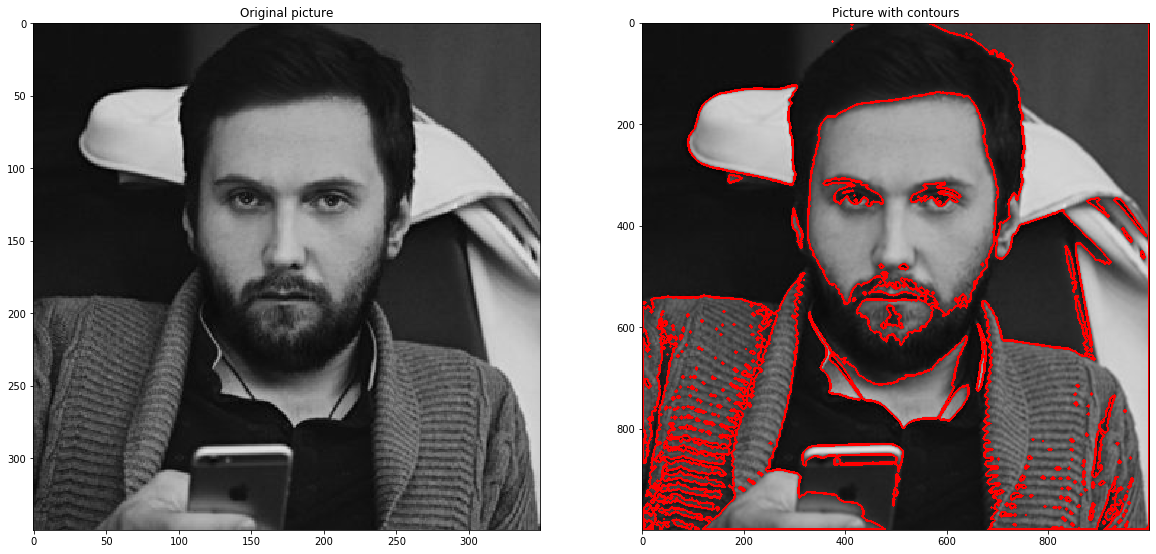

In [5]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,2, 1)
plt.imshow(picture)
plt.title('Original picture')
fig.add_subplot(1,2, 2)
plt.title('Picture with contours')
plt.imshow(contoured_image)
plt.show()

## Детектирование лиц в видеопотоке

Ниже представлен метод построения детектора лиц в видеопотоке.

В качестве детектора использован каскад Хаара, а данные поступают напрямую из веб-камеры

In [6]:
import cv2

cap = cv2.VideoCapture(0)
cascades_directory = cv2.haarcascades
cascade_file_name = 'haarcascade_frontalface_default.xml'
faceDetector = cv2.CascadeClassifier(cascades_directory + cascade_file_name)
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceDetector.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30,40)
    )
    
    for (x,y,w,h) in faces:
        roi_color = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow('frame', roi_color)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

## Детектирование лиц на фото

In [19]:
def detect_face(detector, original_picture, color_converter_scheme):
    gray_picture = cv2.cvtColor(original_picture, color_converter_scheme)
    face = detector.detectMultiScale(
        gray_picture,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(50,50)
    )
    for (x,y,w,h) in face:
        return cv2.rectangle(original_picture,(x,y),(x+w,y+h),(255,0,0),2)

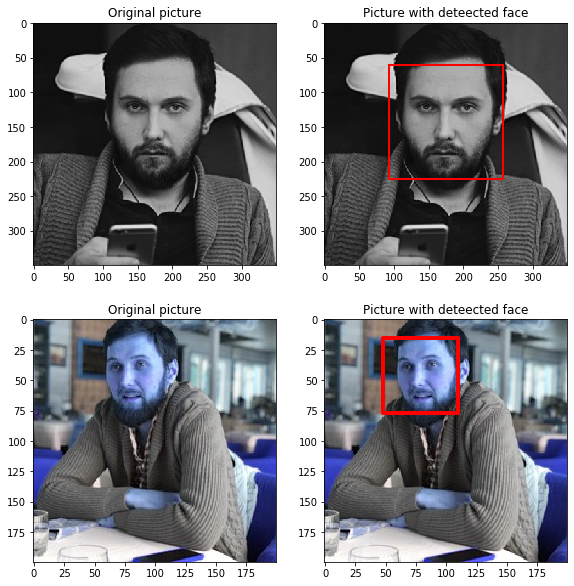

In [20]:
cascades_directory = cv2.haarcascades
cascade_file_name = 'haarcascade_frontalface_default.xml'
faceDetector = cv2.CascadeClassifier(cascades_directory + cascade_file_name)

super_colored_picture = cv2.imread('echo_foto.jpg')

not_super_colored_picture = cv2.imread('foto.jpg')

fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,4, 1)
plt.imshow(super_colored_picture)
plt.title('Original picture')
fig.add_subplot(1,4, 2)
plt.title('Picture with deteected face')
super_colored_picture_detected = detect_face(faceDetector, super_colored_picture, cv2.COLOR_BGR2GRAY)
plt.imshow(super_colored_picture_detected)
fig.add_subplot(2,4, 1)
plt.imshow(not_super_colored_picture)
plt.title('Original picture')
fig.add_subplot(2,4, 2)
plt.title('Picture with deteected face')
not_super_colored_picture_detected = detect_face(faceDetector, not_super_colored_picture, cv2.COLOR_BGR2GRAY)
plt.imshow(not_super_colored_picture_detected)
plt.show()

